## TreeFitter/Rave plots
Overlaid Treefitter/Rave histograms for continuum/generic background over ~1 stream of Belle MC.
Bottom shows plots of kinematic variables over all modes.

/home/jtan/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


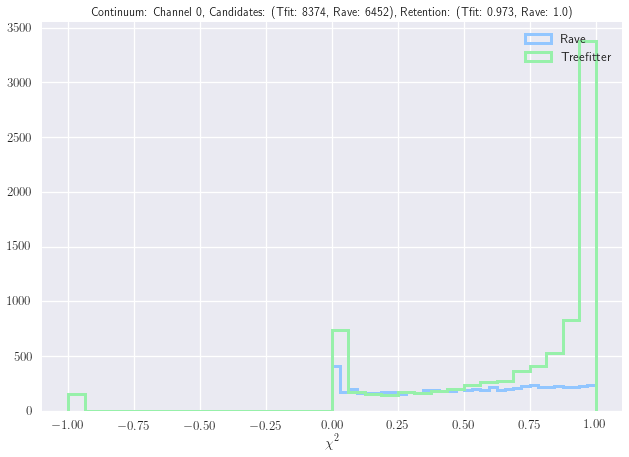

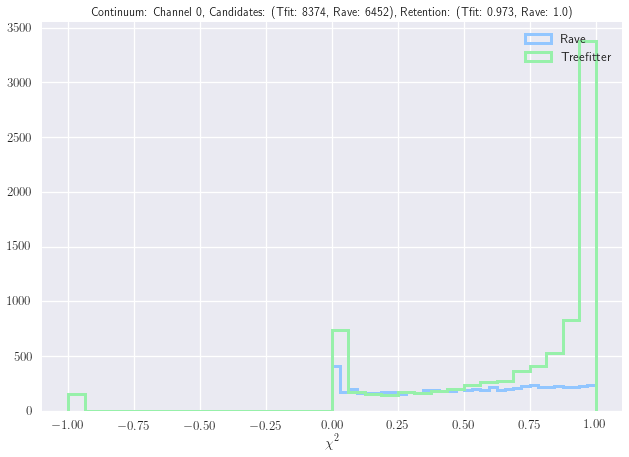

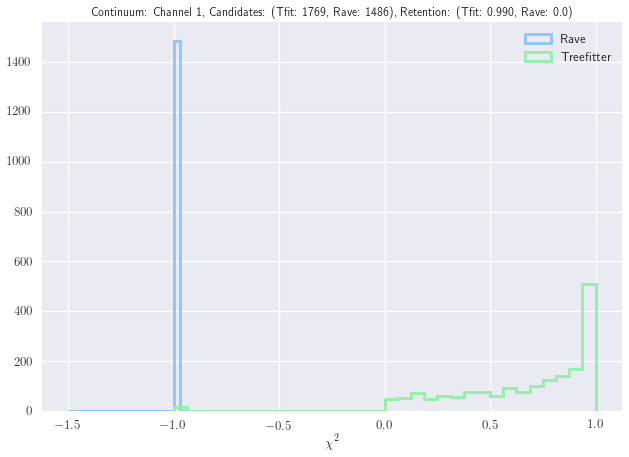

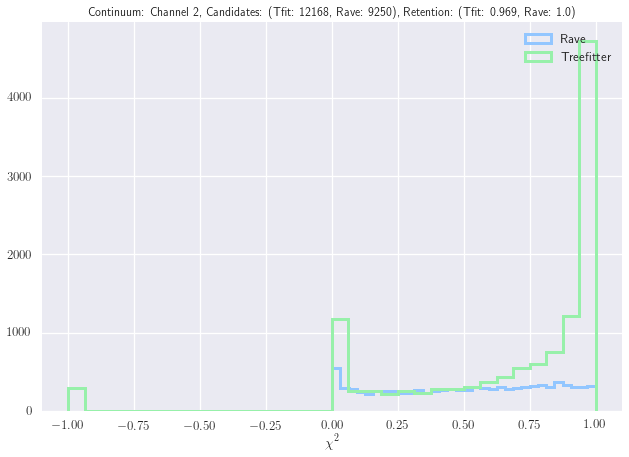

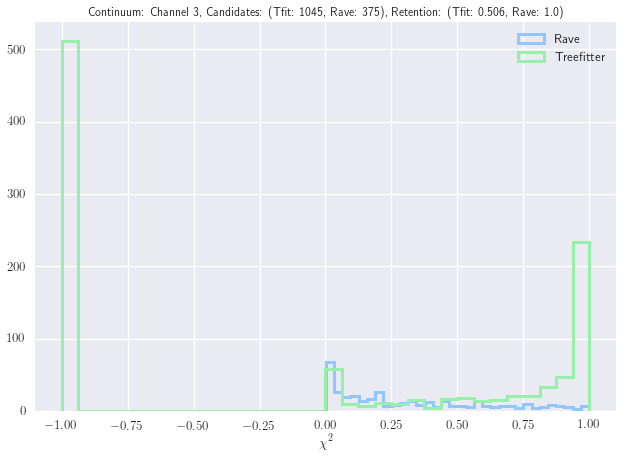

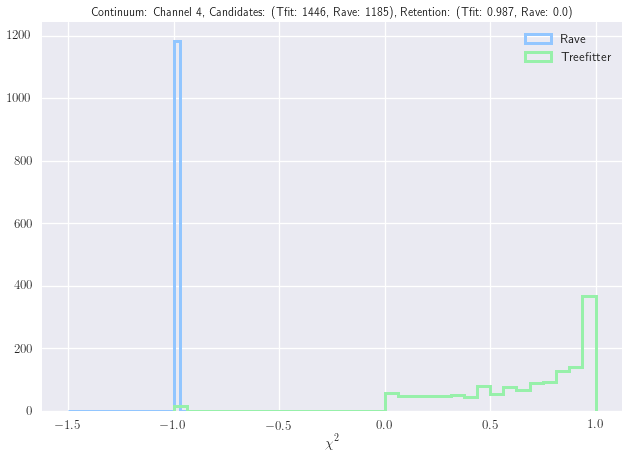

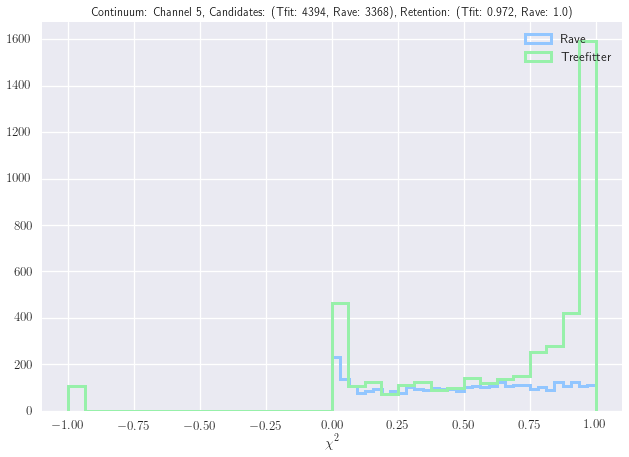

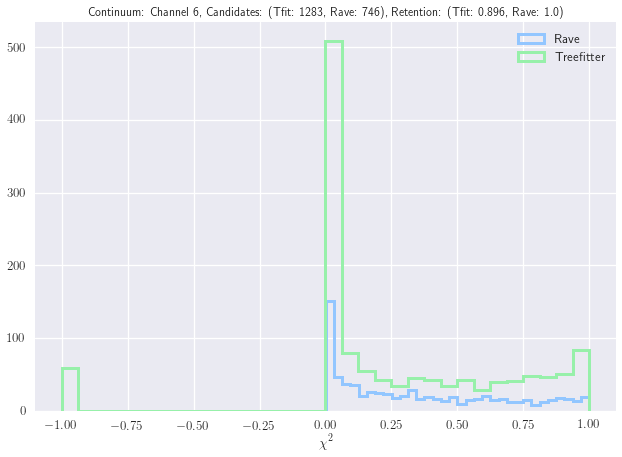

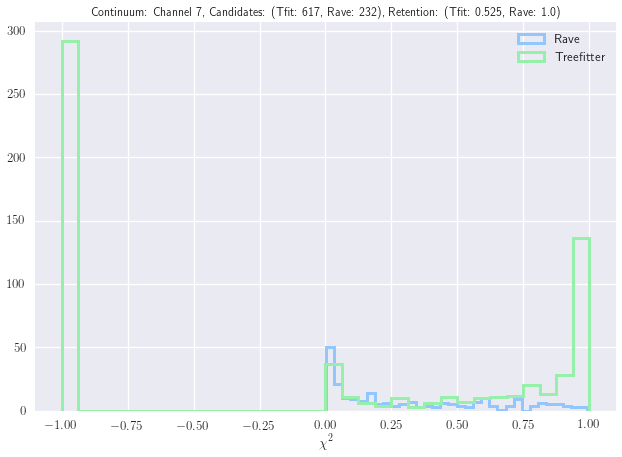

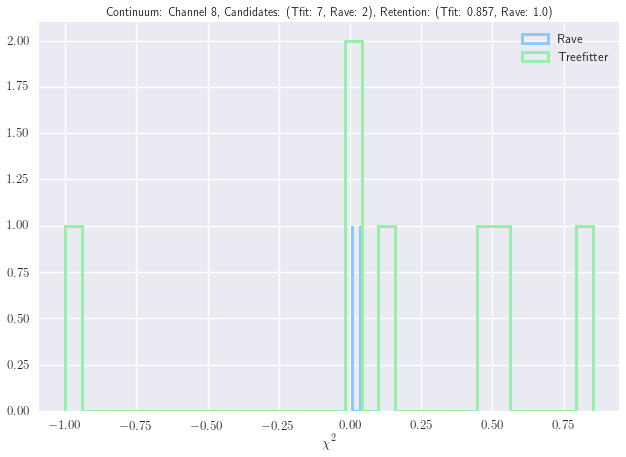

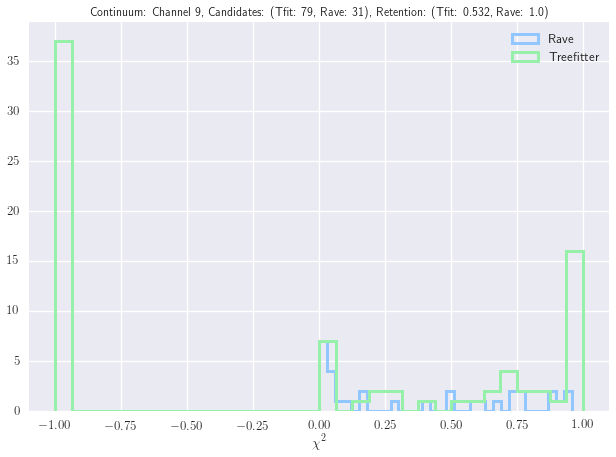

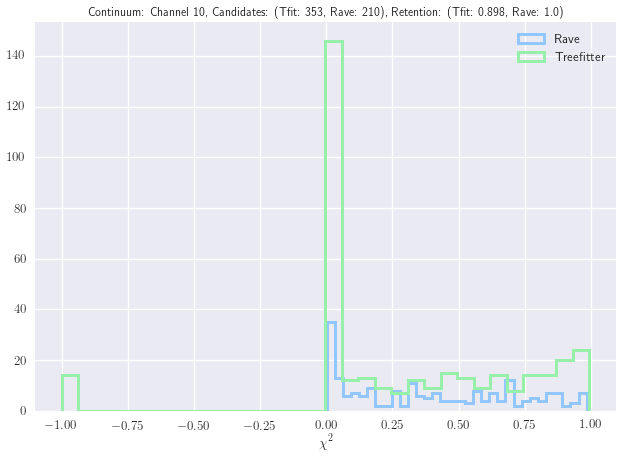

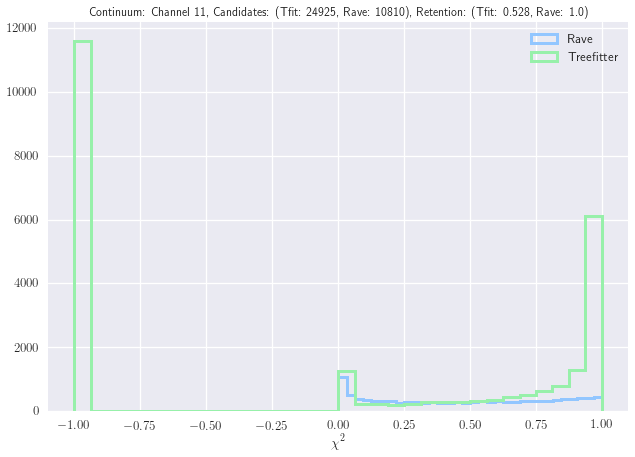

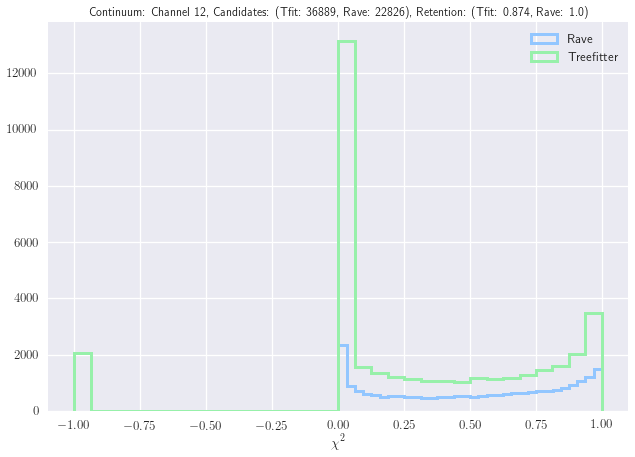

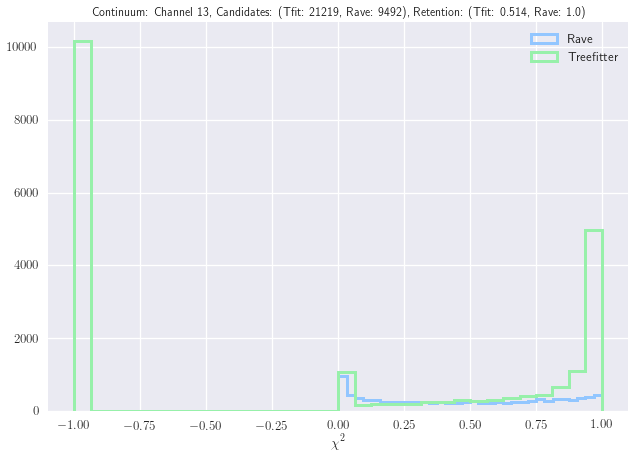

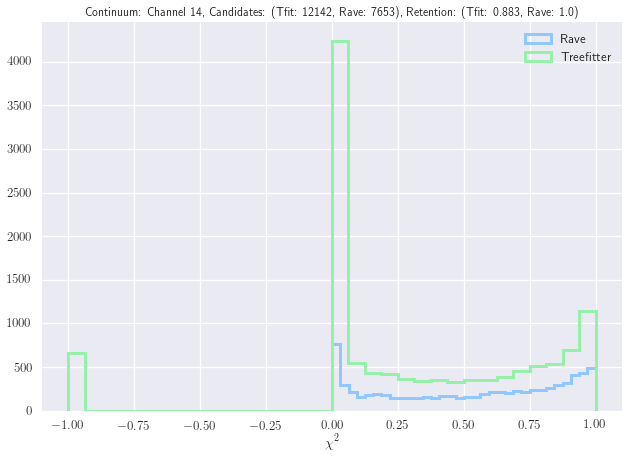

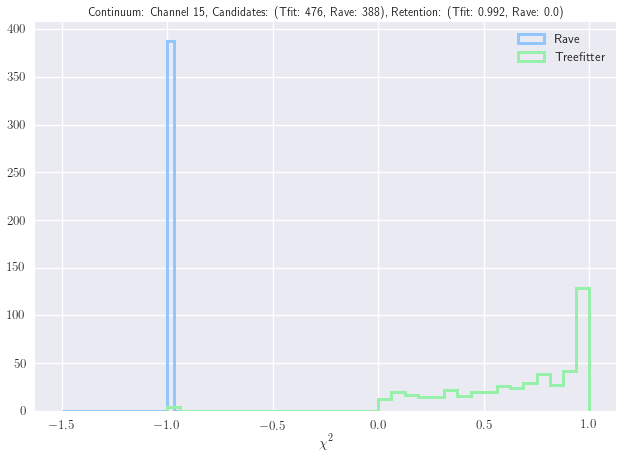

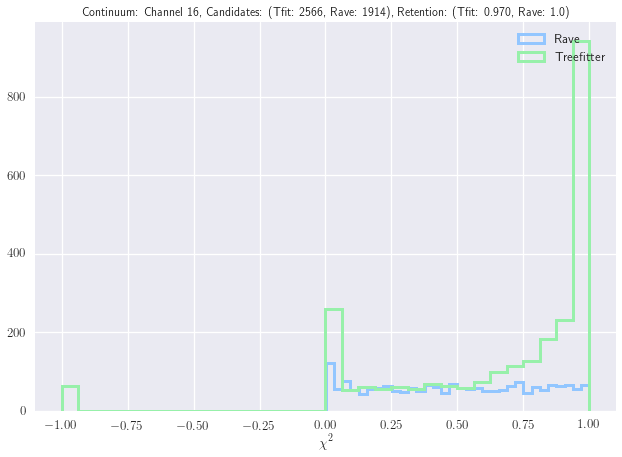

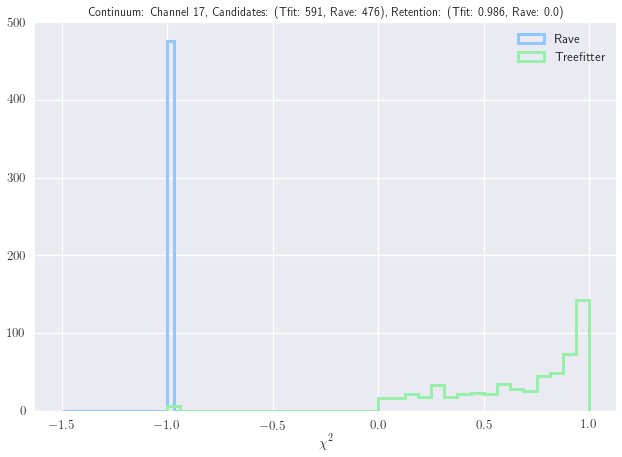

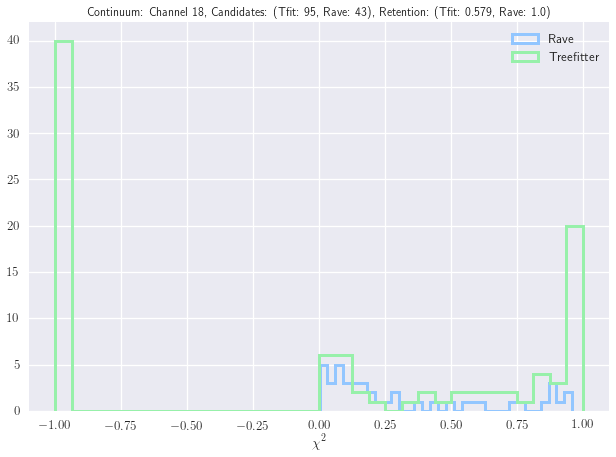

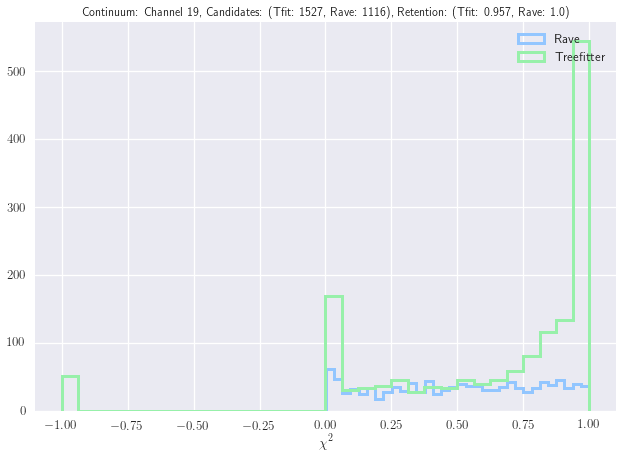

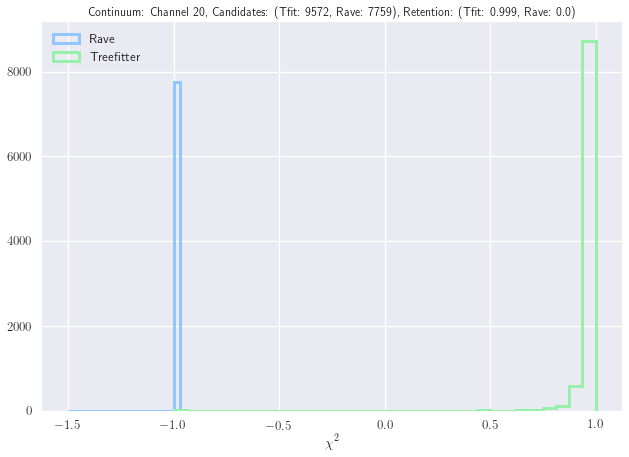

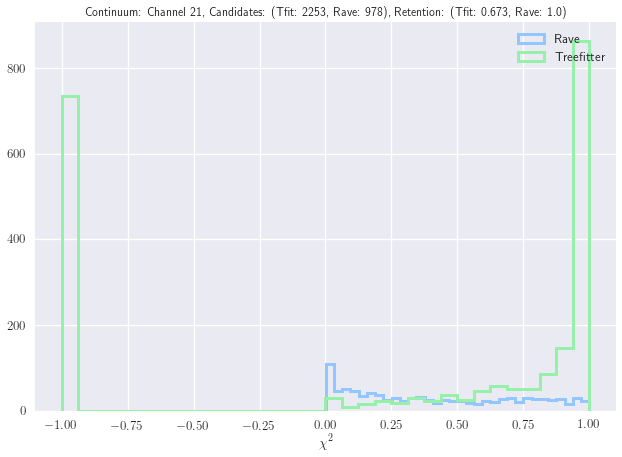

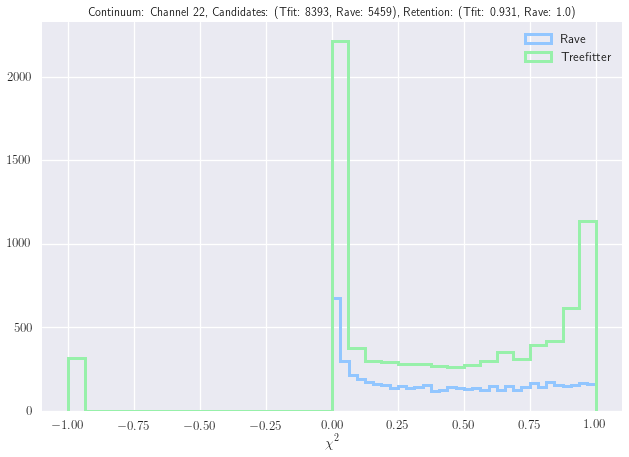

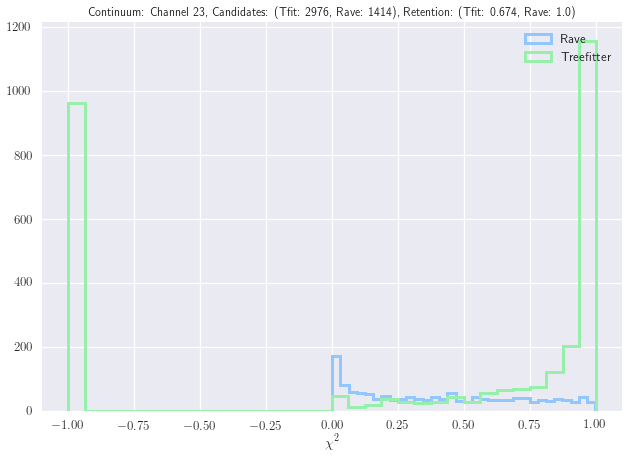

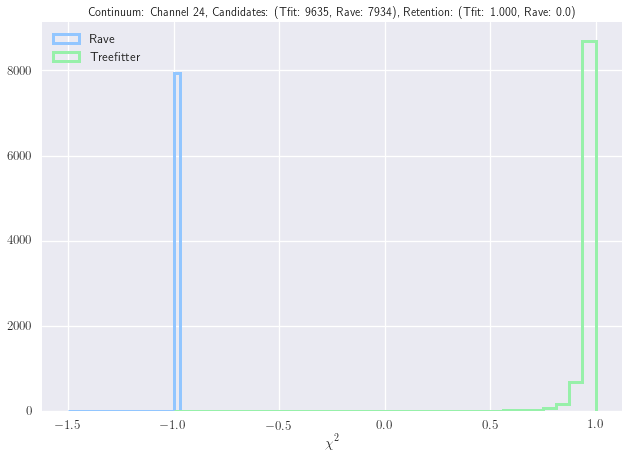

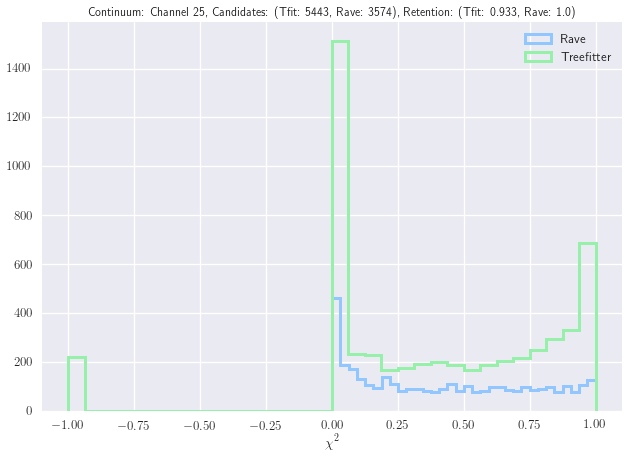

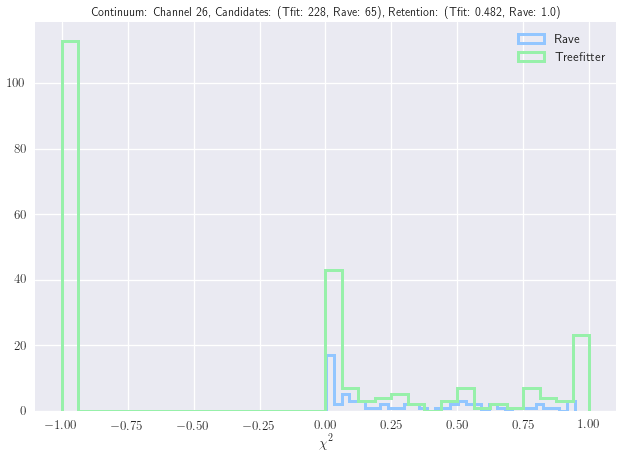

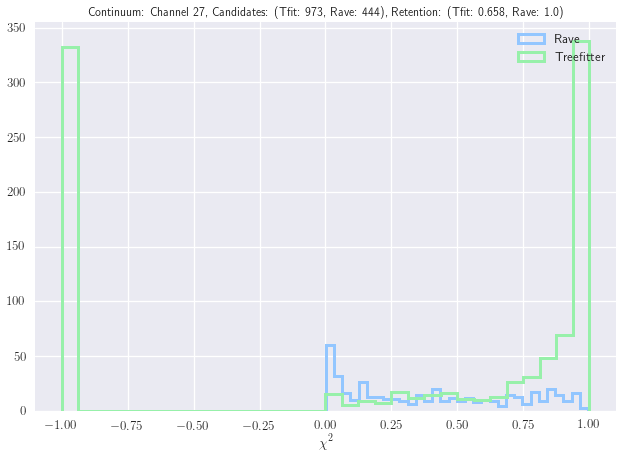

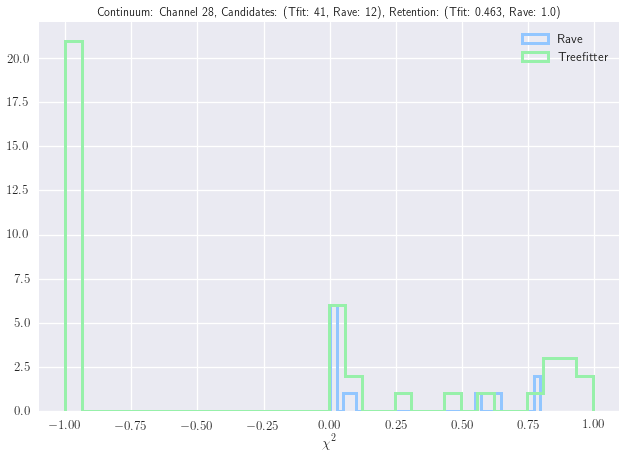

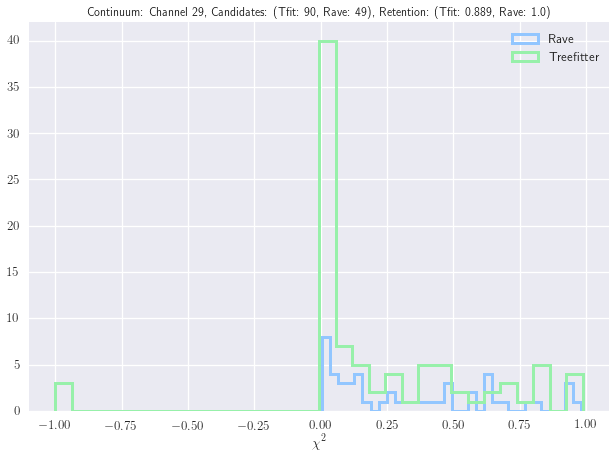

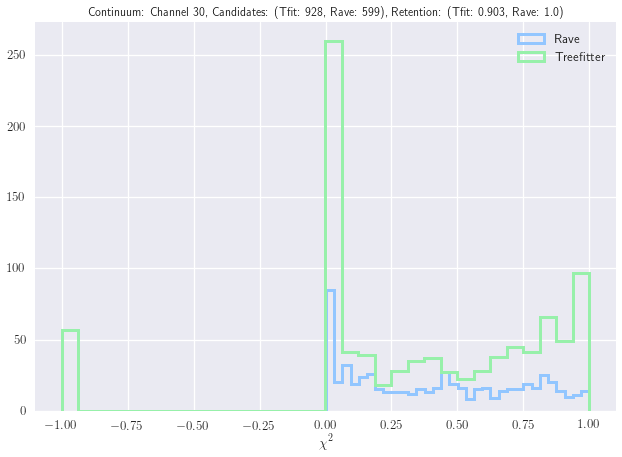

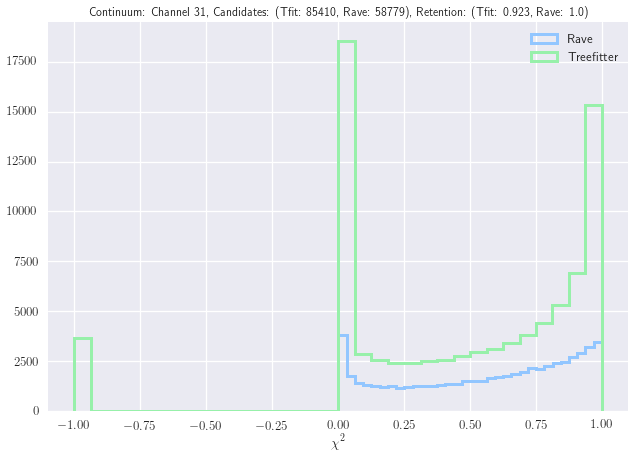

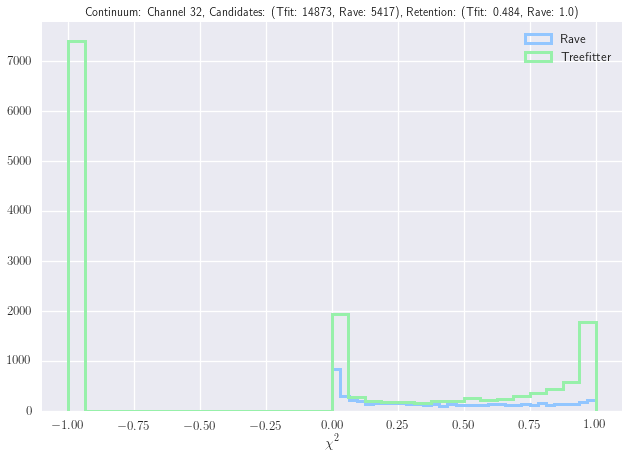

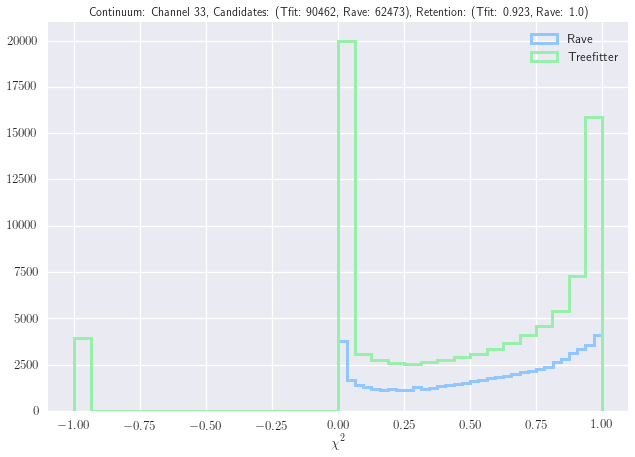

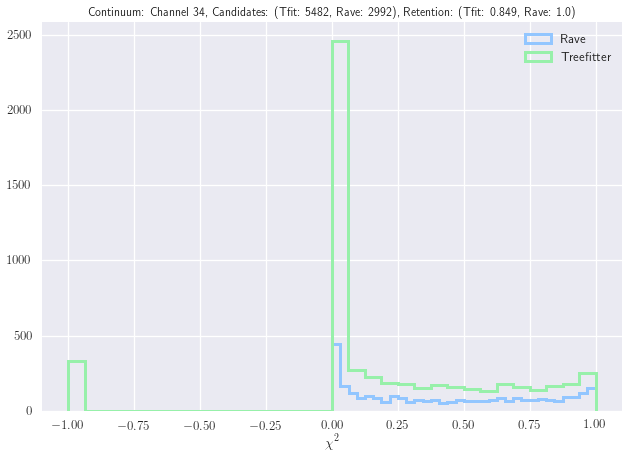

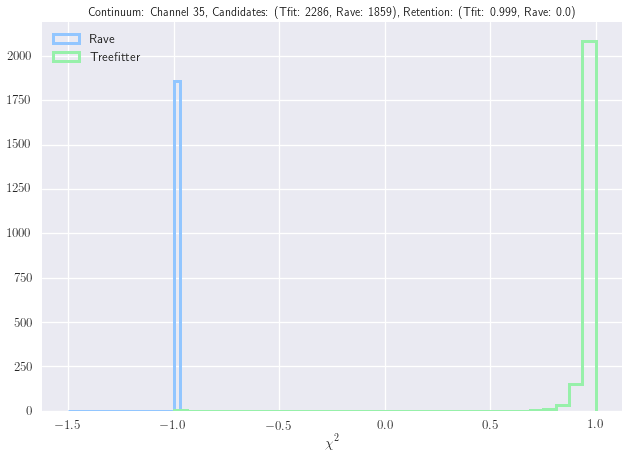

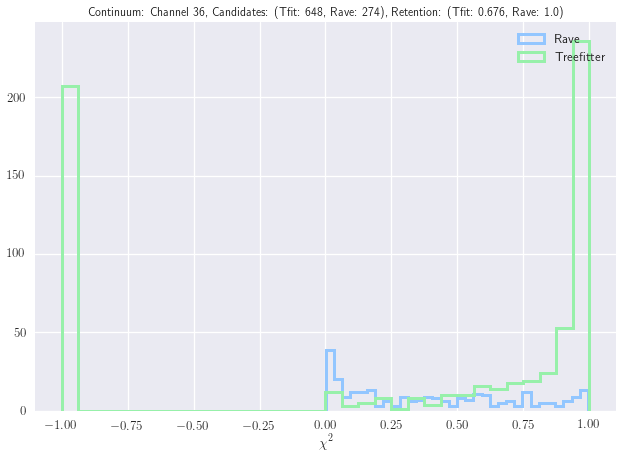

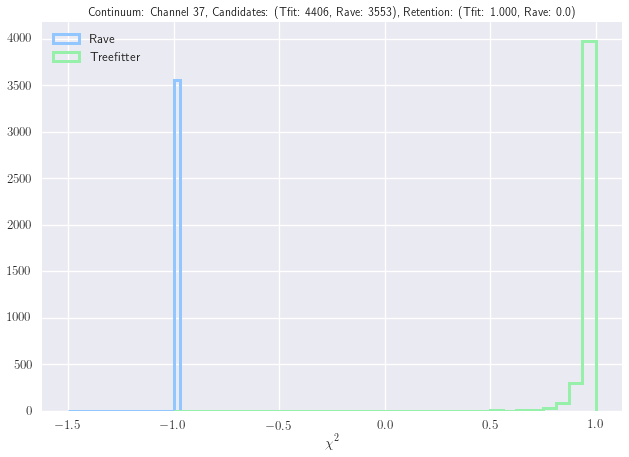

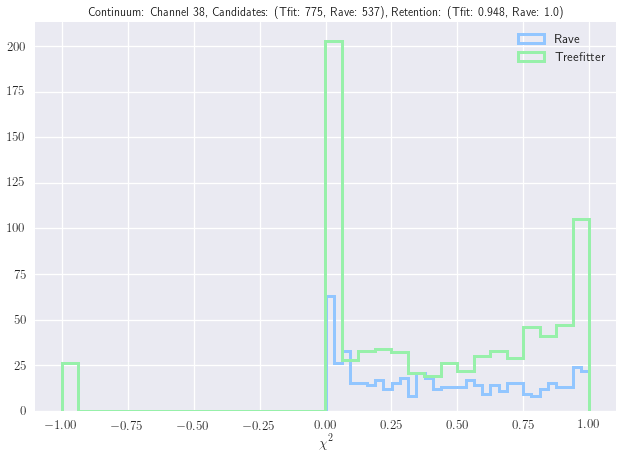

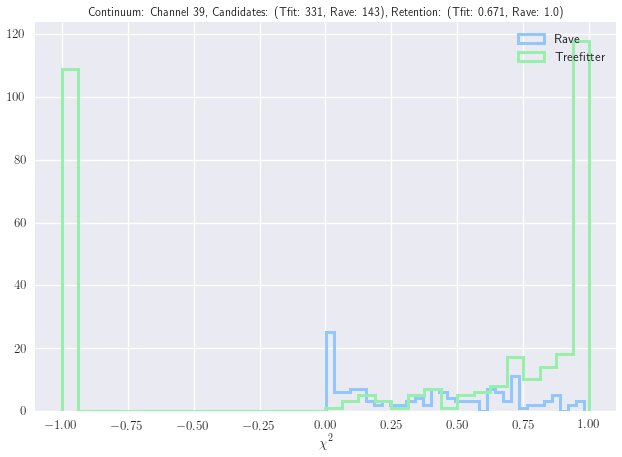

In [108]:
df_cont.groupby('channel').apply(plotChiSq_cont)
plt.show()

/home/jtan/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


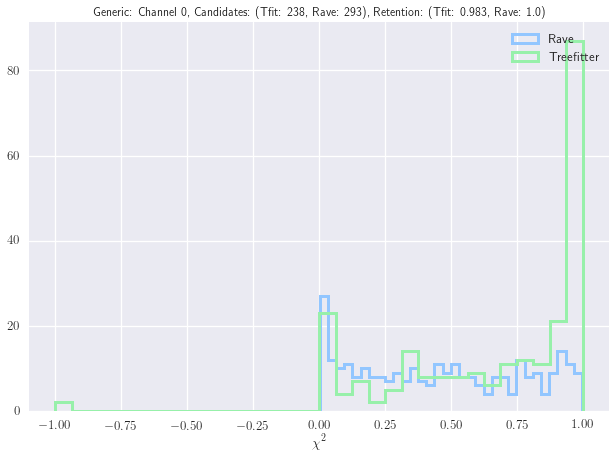

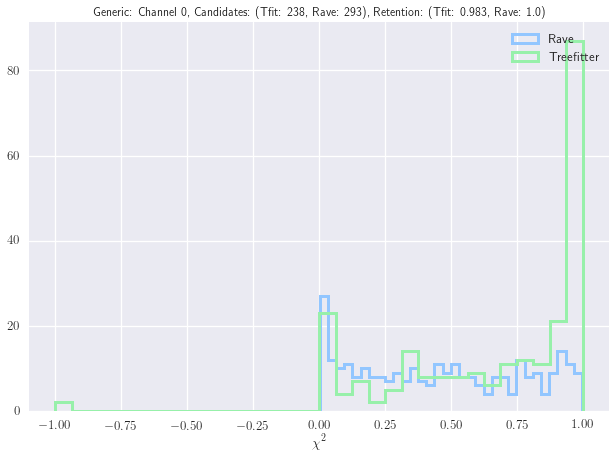

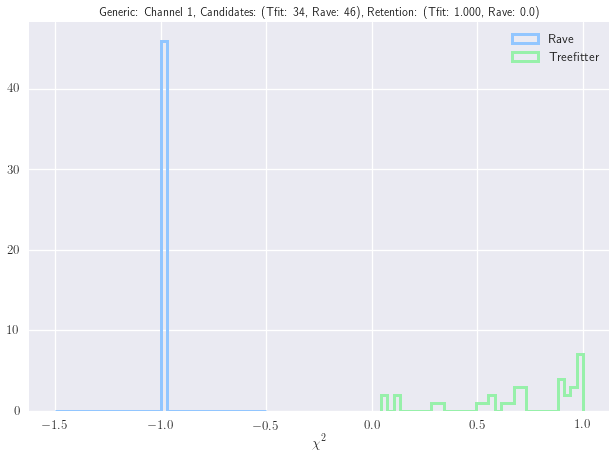

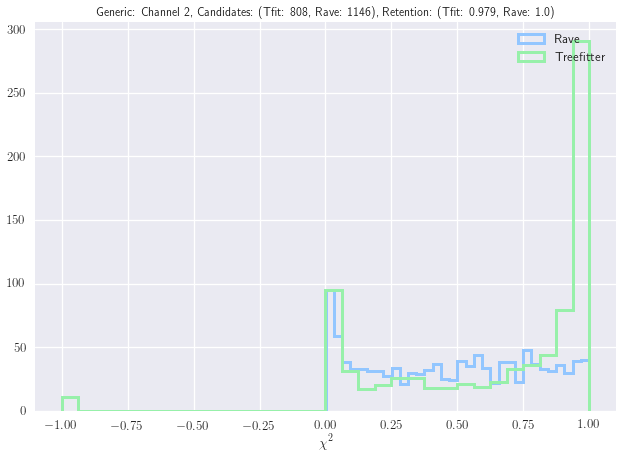

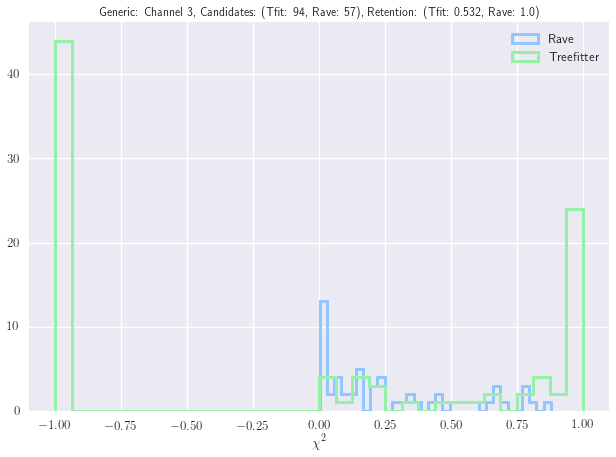

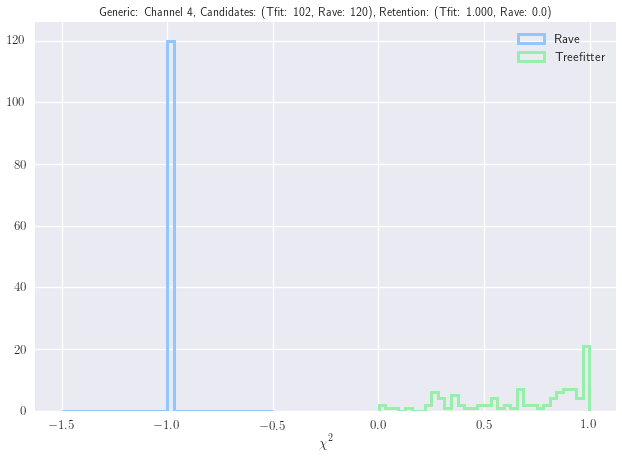

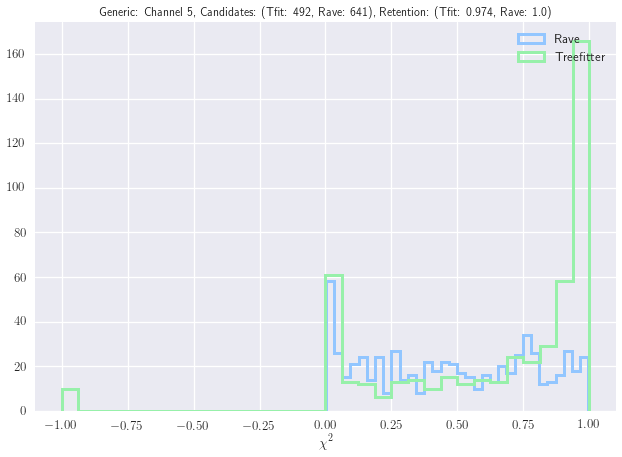

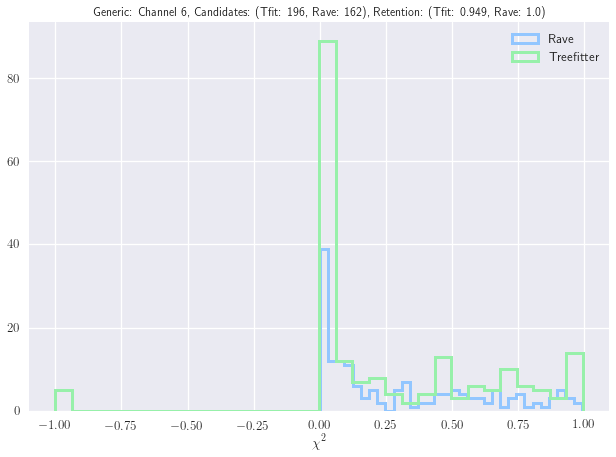

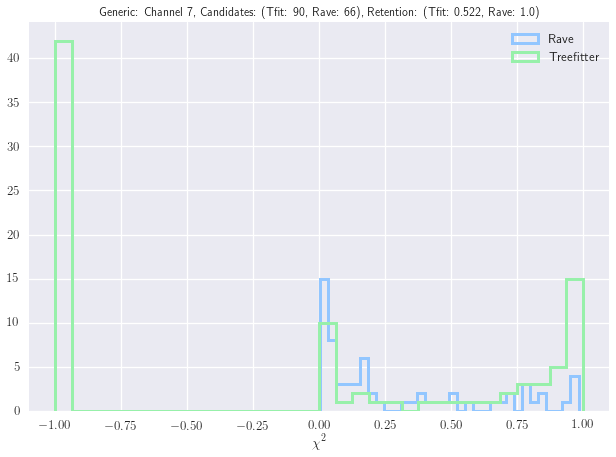

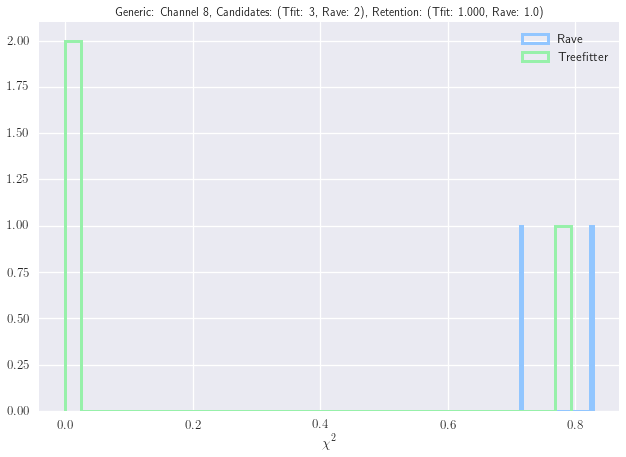

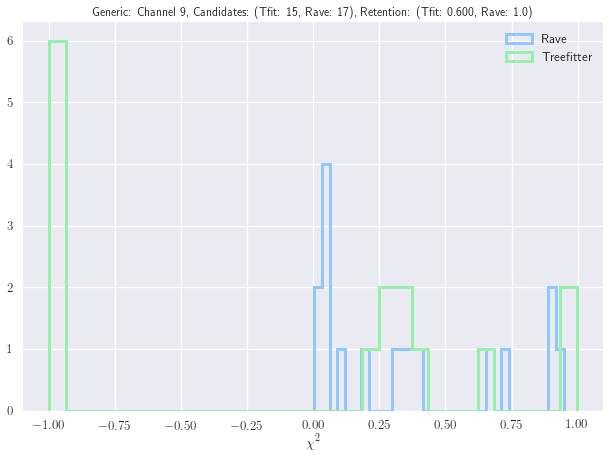

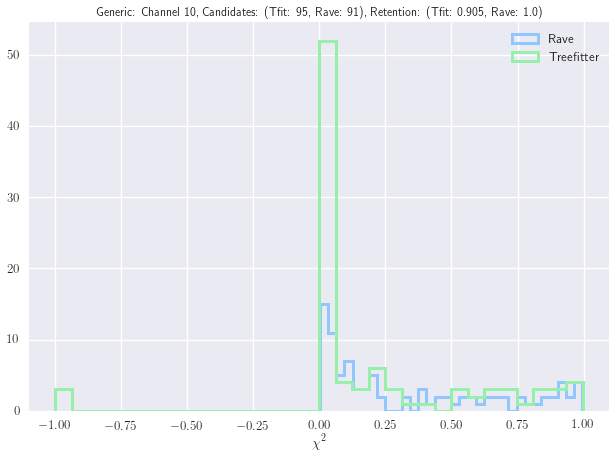

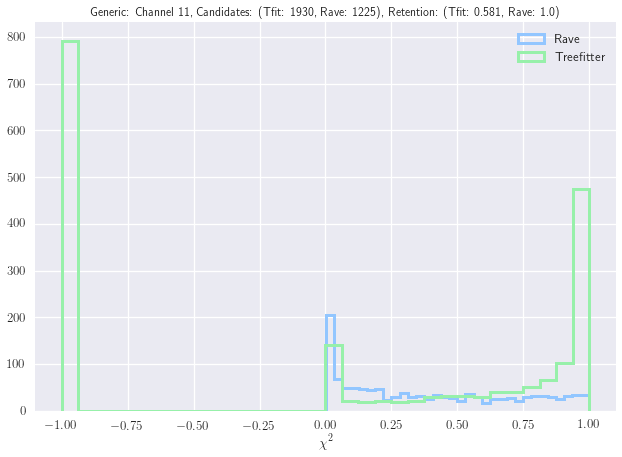

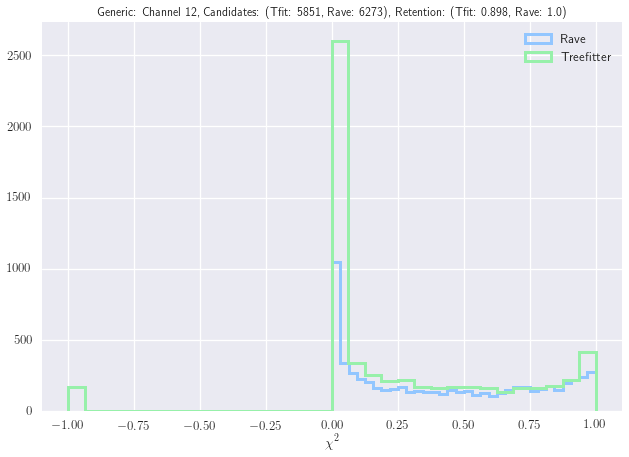

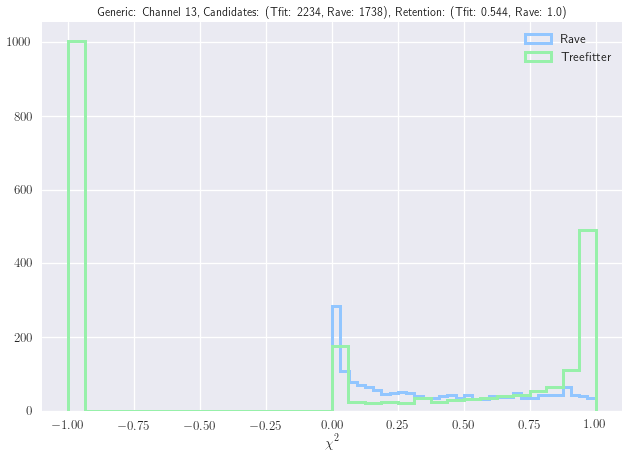

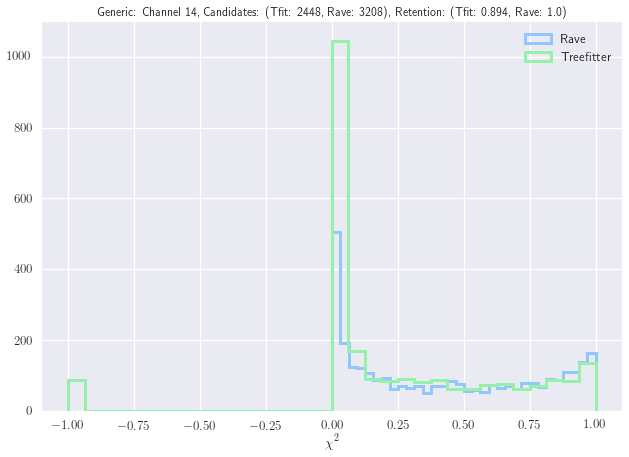

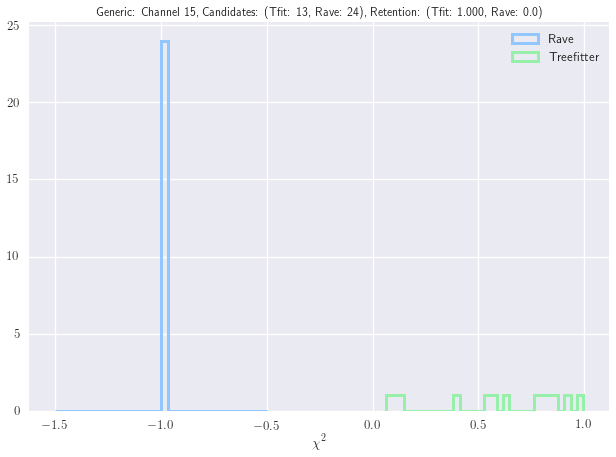

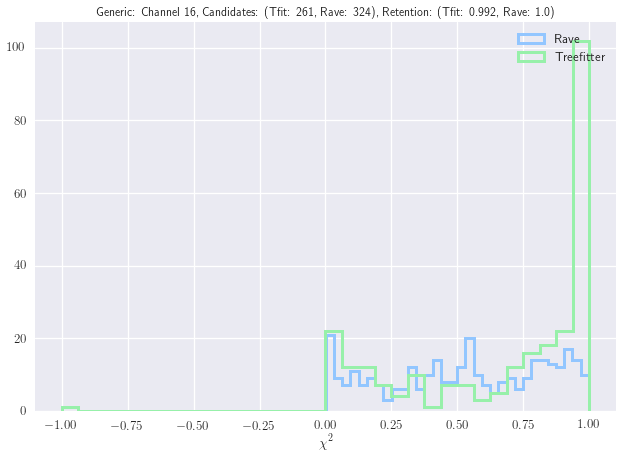

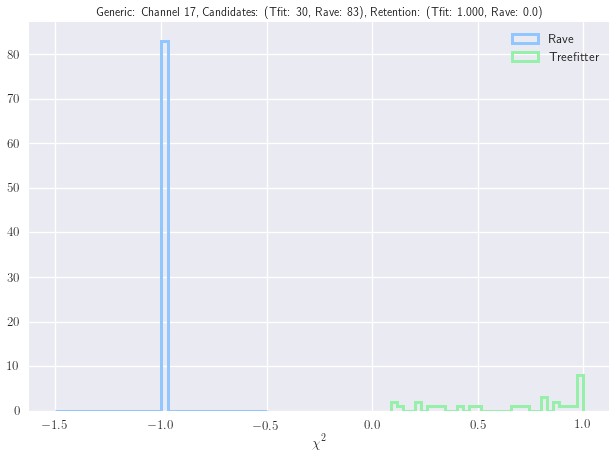

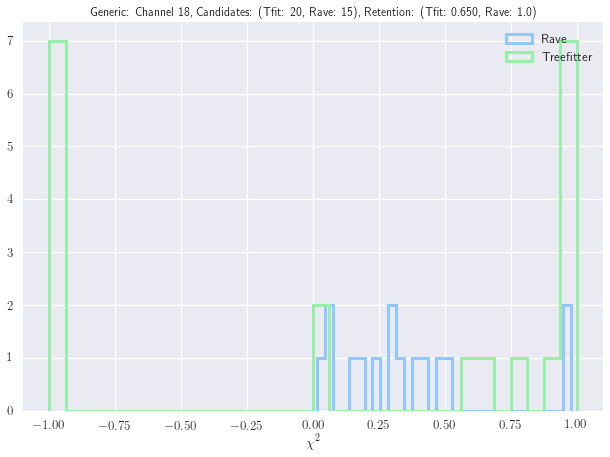

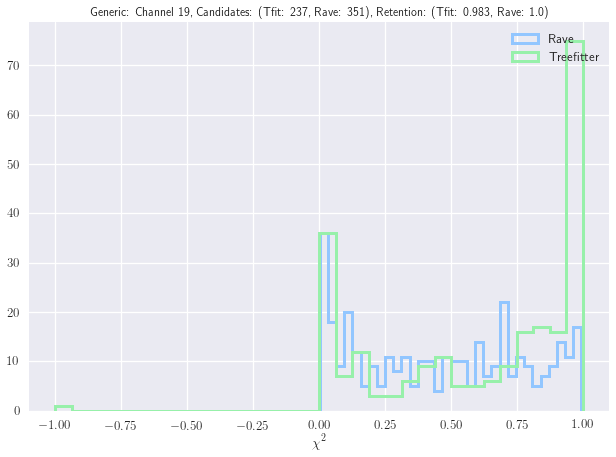

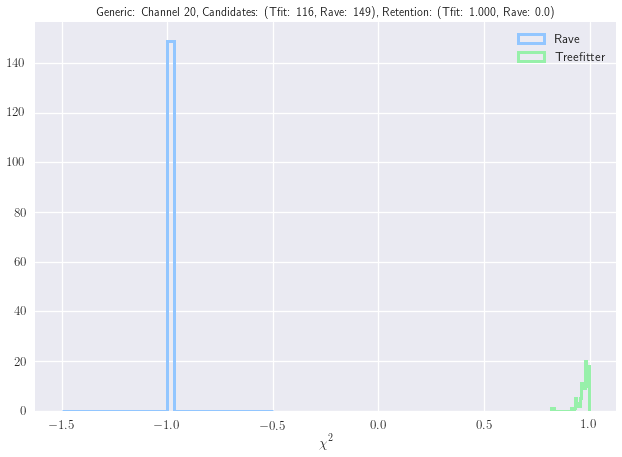

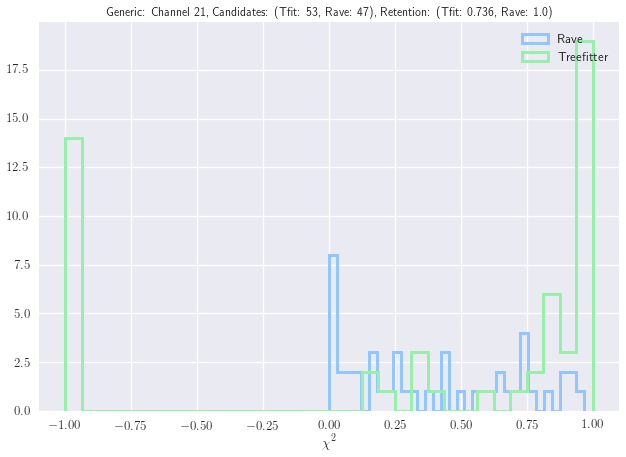

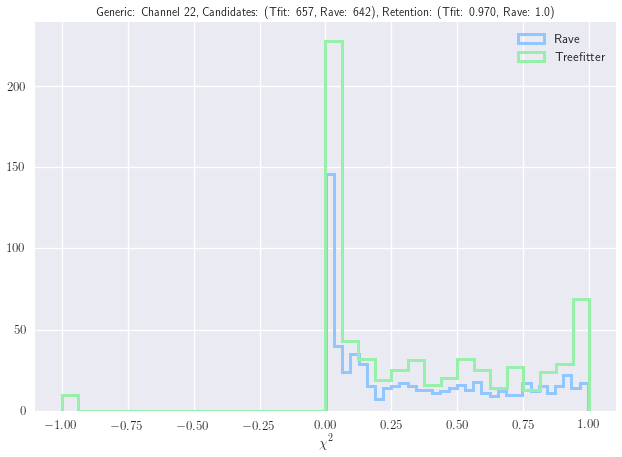

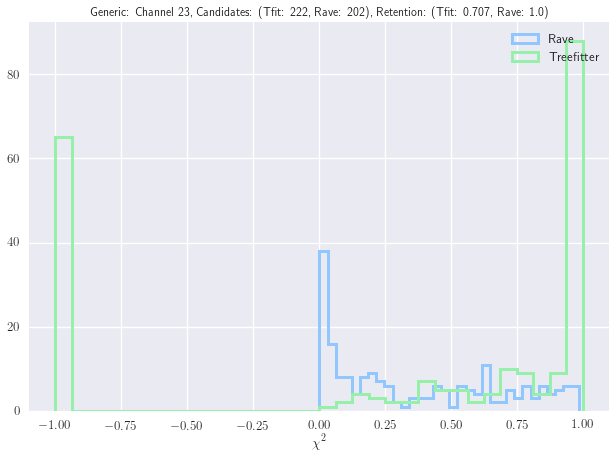

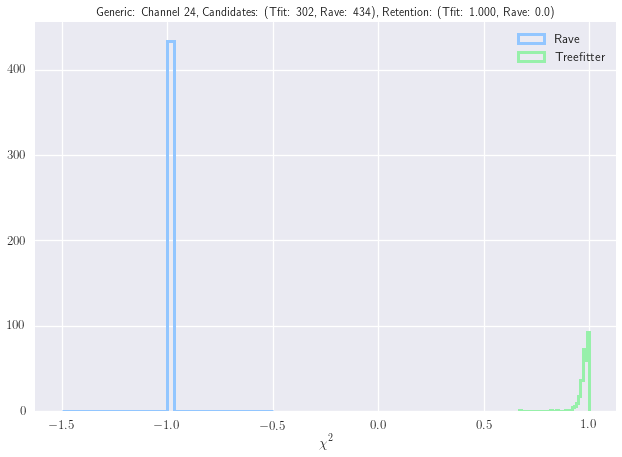

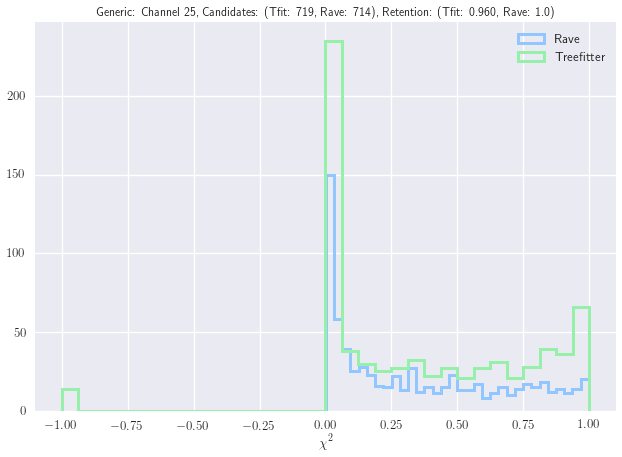

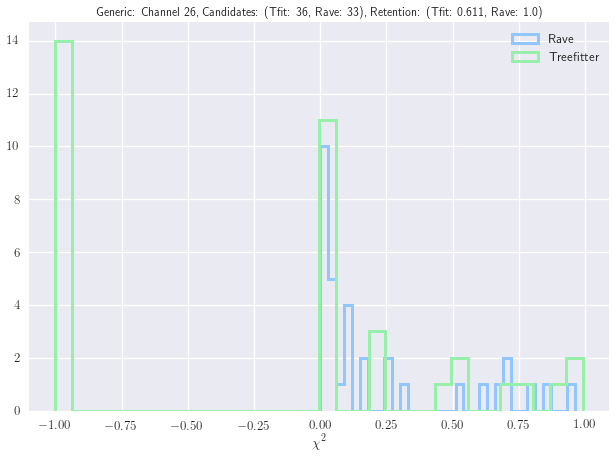

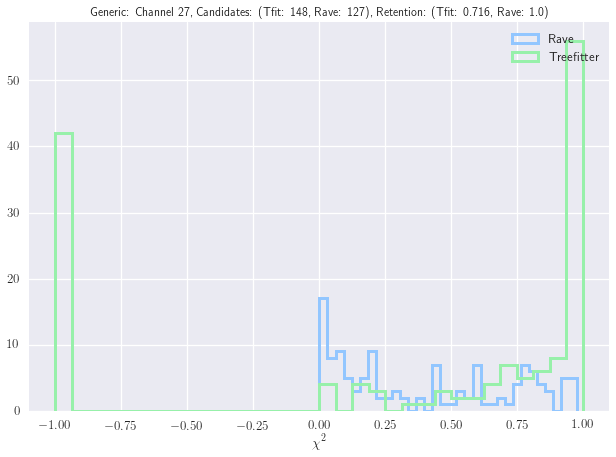

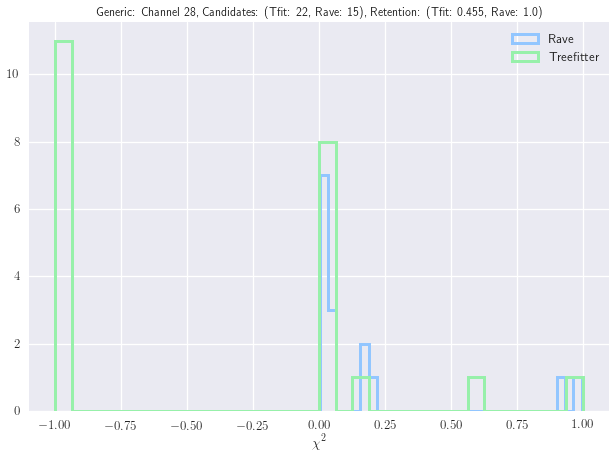

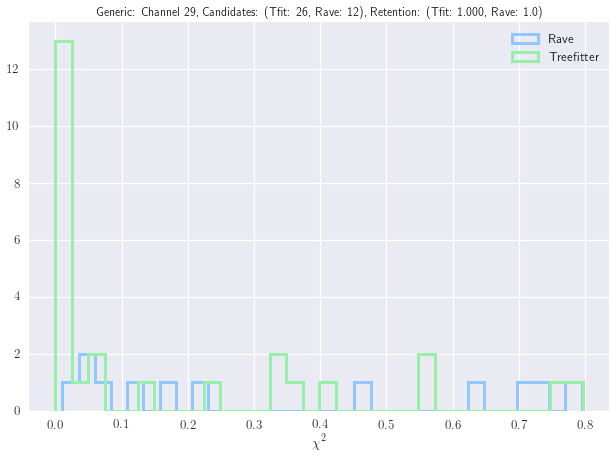

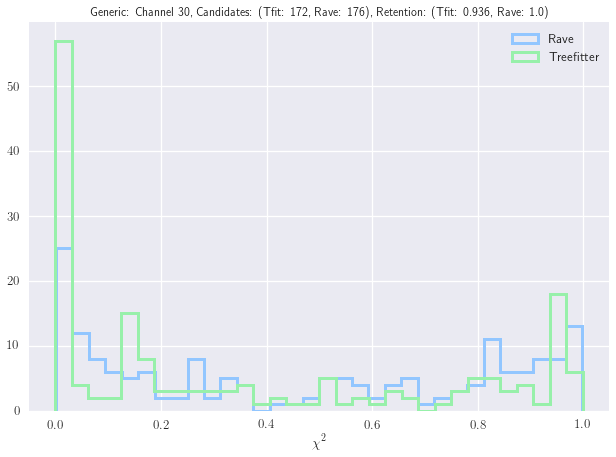

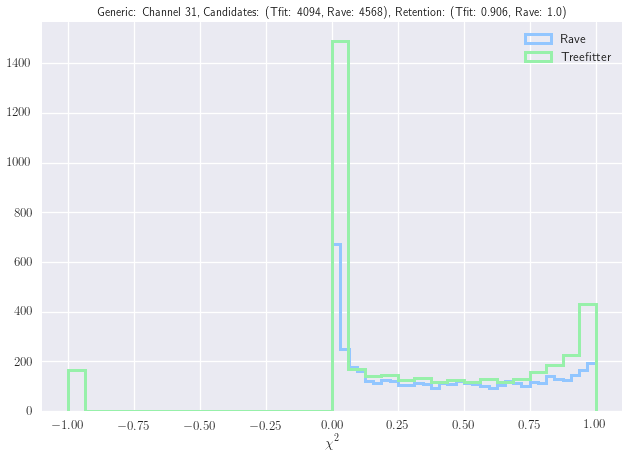

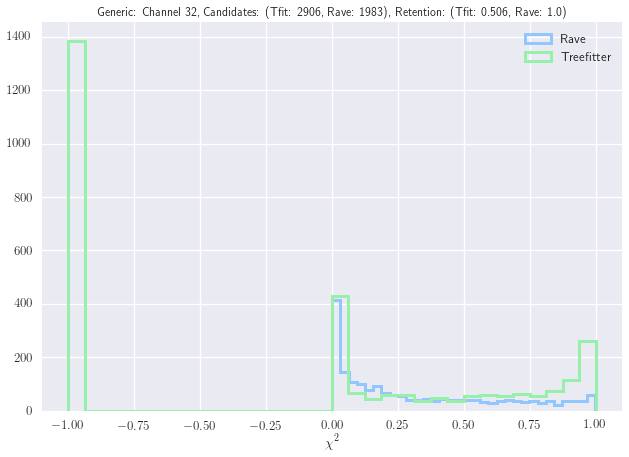

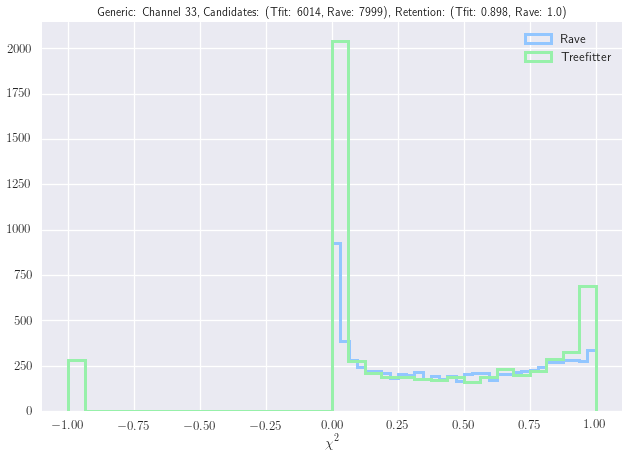

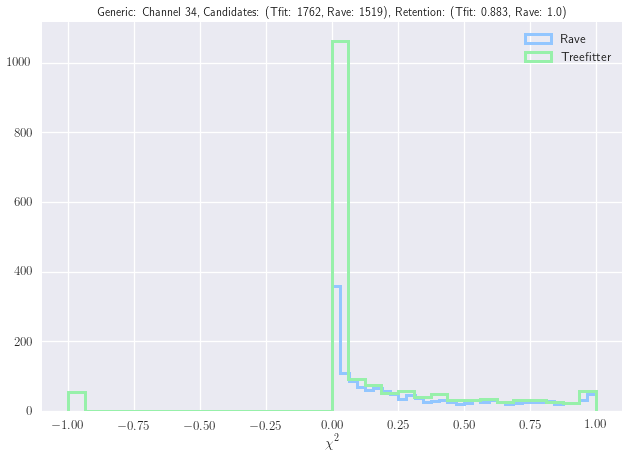

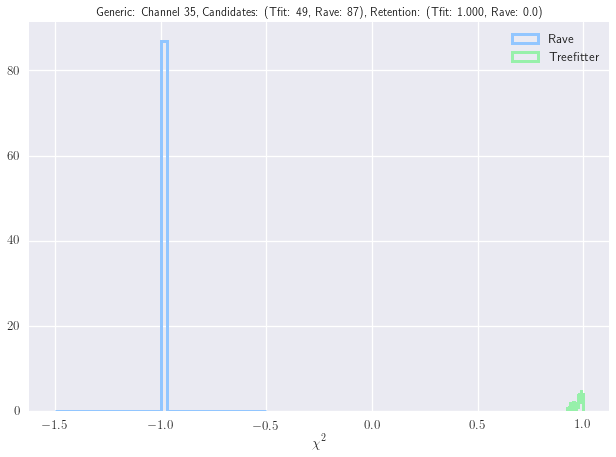

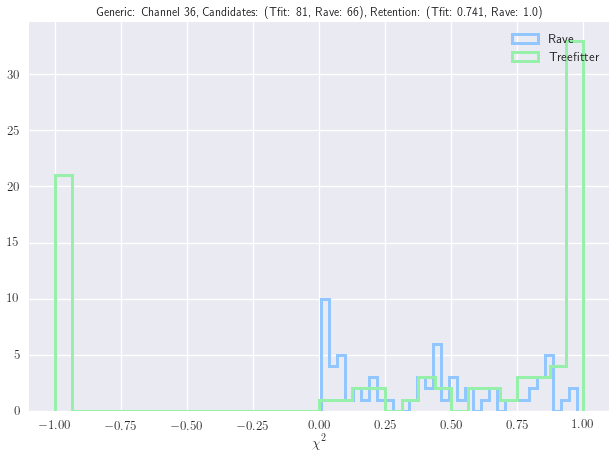

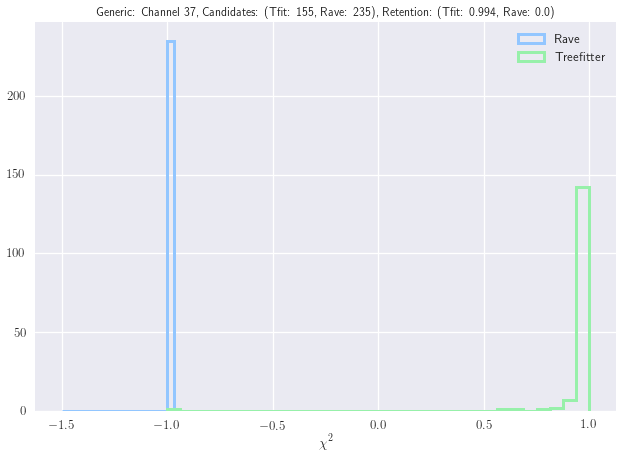

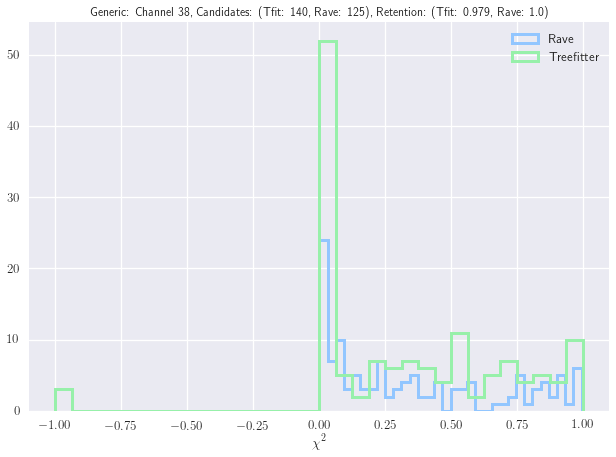

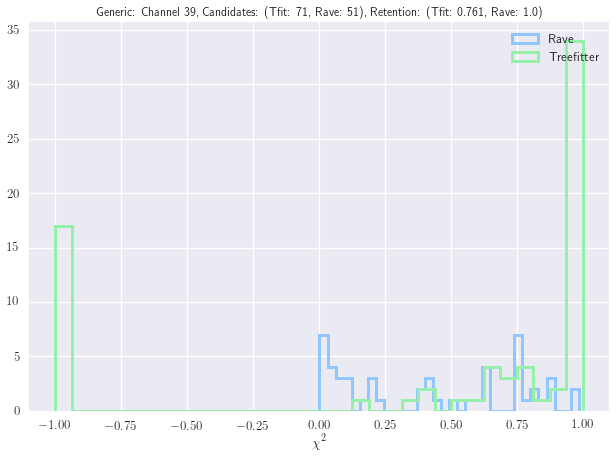

In [112]:
df_gen.groupby('channel').apply(plotChiSq_generic)
plt.show()

In [19]:
def truncate_tails(hist, nsigma = 5):
    # Removes feature outliers above nsigma stddevs away from mean
    hist = hist[hist > np.mean(hist)-nsigma*np.std(hist)]
    hist = hist[hist < np.mean(hist)+nsigma*np.std(hist)]
    return hist

def compare_histograms_overlay(data_sig, data_bkg, title, nbins=50, columns=None, norm=True, data_bkg2=None, data_bkg3=None, weights=None):
    # Plot continuum suppression variable distributions for signal, background
    sea_green = '#54ff9f'
    steel_blue = '#4e6bbd'
    crimson_tide = '#e50005'
    yellow = 'xkcd:crimson'
    orange = '#ffa500'
    titles={'mbc': r'$M_{bc}$ (GeV)', 'deltae': r'$\Delta E$ (GeV)', 'daughterInvM': r'$M_{X_q}$ (GeV)'}
    for variable in columns:      
        d_sig = truncate_tails(data_sig[variable].values,4)
        d_bkg = truncate_tails(data_bkg[variable].values,4)
        
        sns.distplot(d_bkg, color = steel_blue, hist=True, kde=False, norm_hist=norm, label = r'Rave',bins=nbins,
             hist_kws=dict(edgecolor="0.85", linewidth=0.5, alpha = 0.65))
        if isinstance(data_bkg2, pd.DataFrame):
            d_bkg2 = truncate_tails(data_bkg2[variable].values,5)
            sns.distplot(d_bkg2, hist=True, kde=False, norm_hist=norm, label = r'Generic $B\bar{B}$',bins=nbins,
                 hist_kws=dict(edgecolor="0.85", color=crimson_tide,linewidth=0.5, alpha = 0.55))
        if isinstance(data_bkg3, pd.DataFrame):
            d_bkg3 = truncate_tails(data_bkg3[variable].values,5)
            sns.distplot(d_bkg3, hist=True, color='violet', kde=False, norm_hist=norm, label = r'Self-crossfeed',bins=nbins,
                 hist_kws=dict(edgecolor="0.85", linewidth=0.5, alpha = 0.55))
        sns.distplot(d_sig, color = sea_green, hist=True, kde=False, norm_hist=norm, label = r'TreeFitter',bins=nbins,
             hist_kws=dict(edgecolor="0.85", linewidth=0.5, alpha = 0.8))
    
        plt.autoscale(enable=True, axis='x', tight=False)
        if norm:
            plt.ylabel(r'Normalized events/bin')
        else:
            plt.ylabel(r'Events/bin')
        plt.xlabel(variable.replace('_','-'))
        plt.legend(loc = "best")
        plt.title(title)
        # plt.savefig('graphs/' + variable + '.pdf', bbox_inches='tight',format='pdf', dpi=1000)
        plt.show()
        plt.gcf().clear()

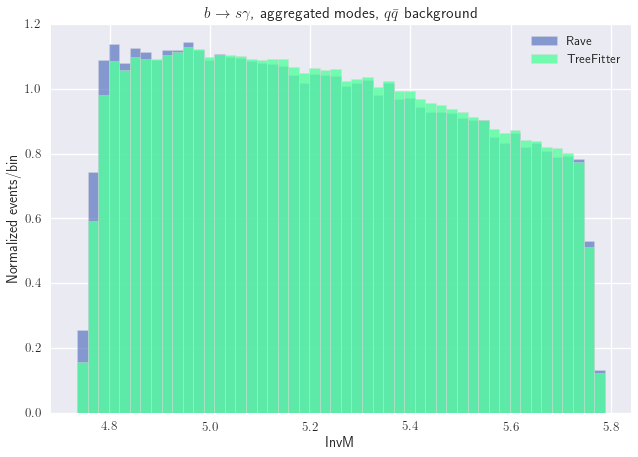

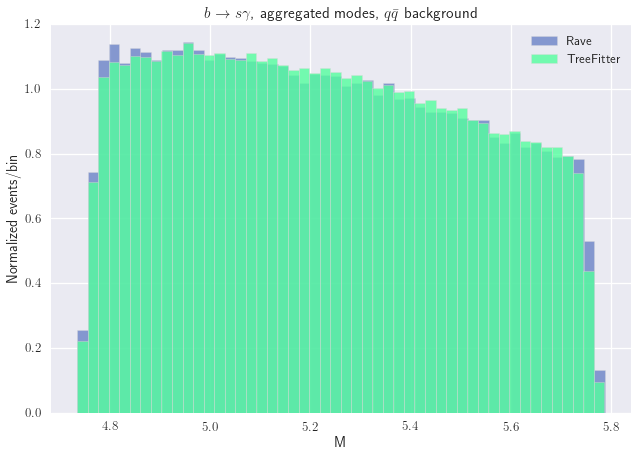

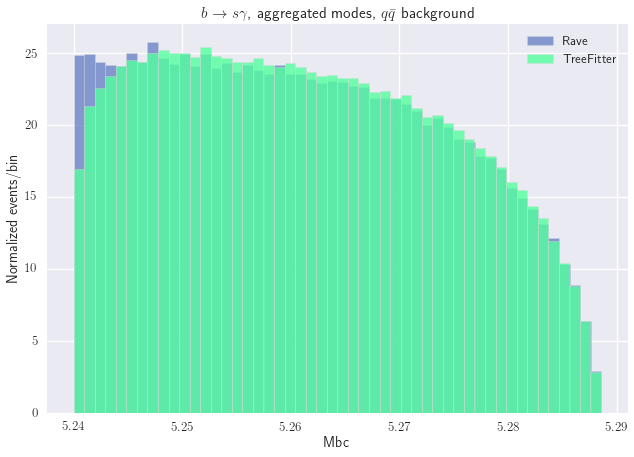

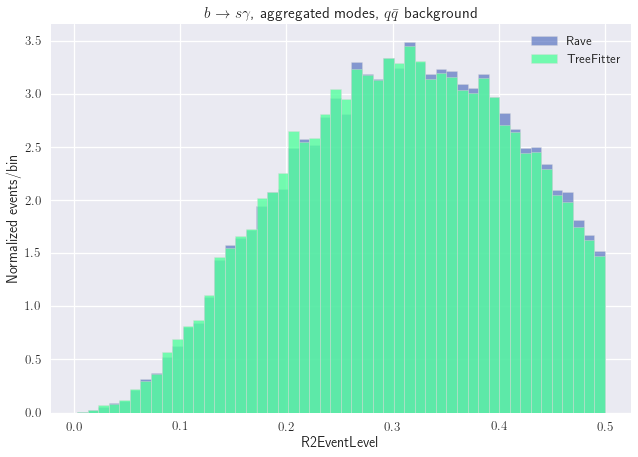

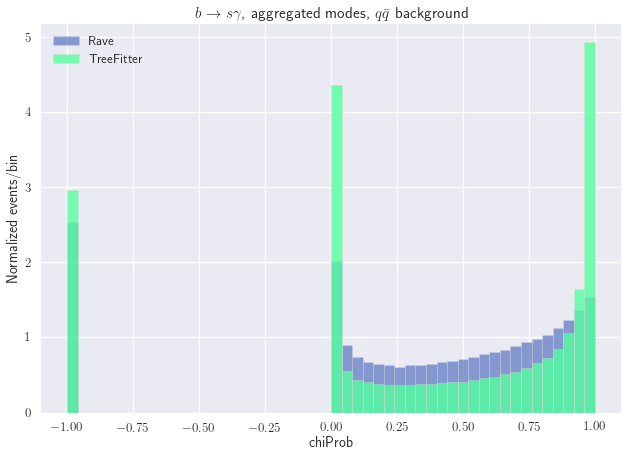

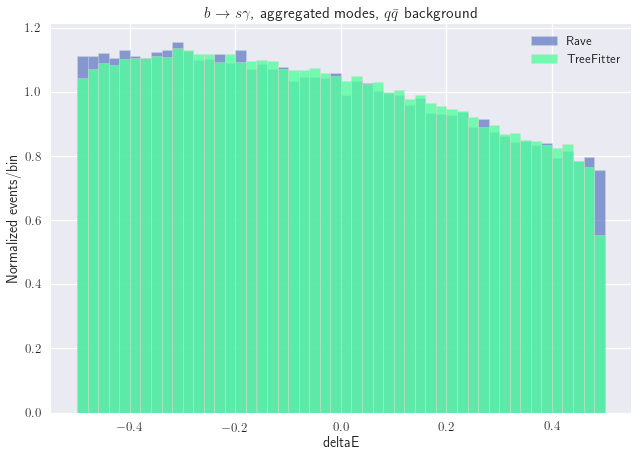

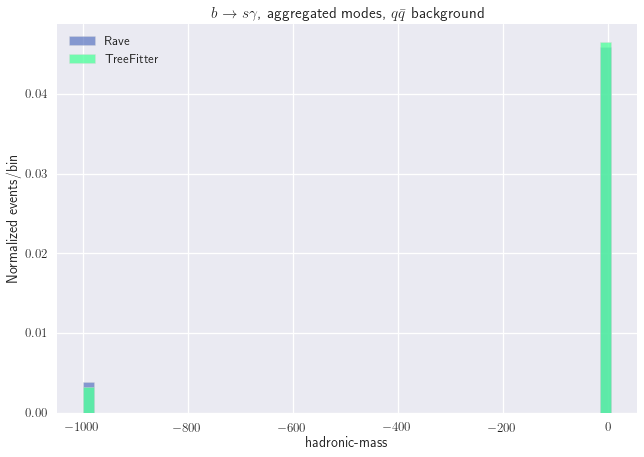

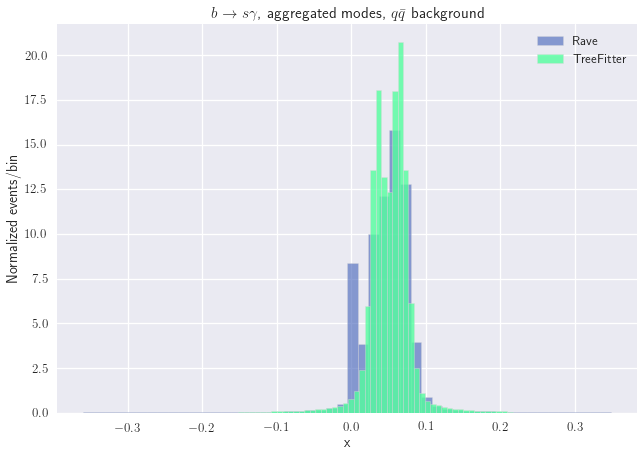

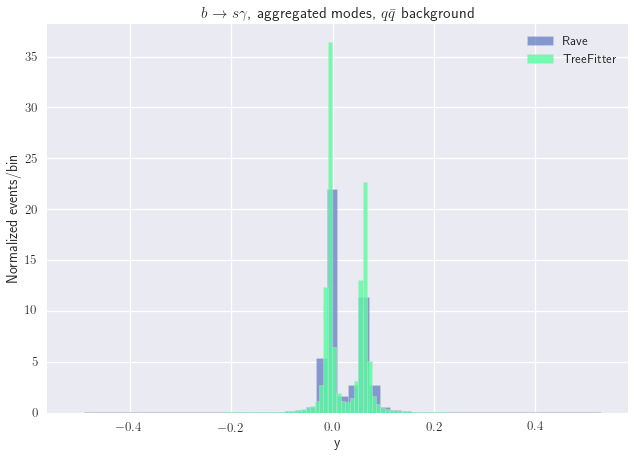

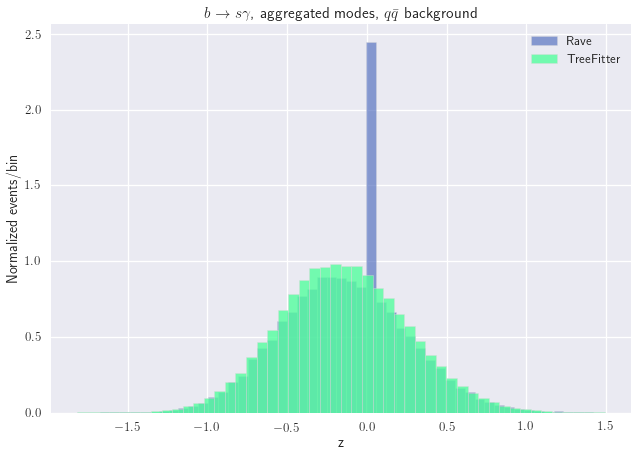

In [22]:
compare_histograms_overlay(df_cont_tfit, df_cont_rave, title=r'$b \rightarrow s \gamma$, aggregated modes, $q\bar{q}$ background', columns=[col for col in df_cont_tfit.columns if ('label' not in col and 'channel' not in col)])

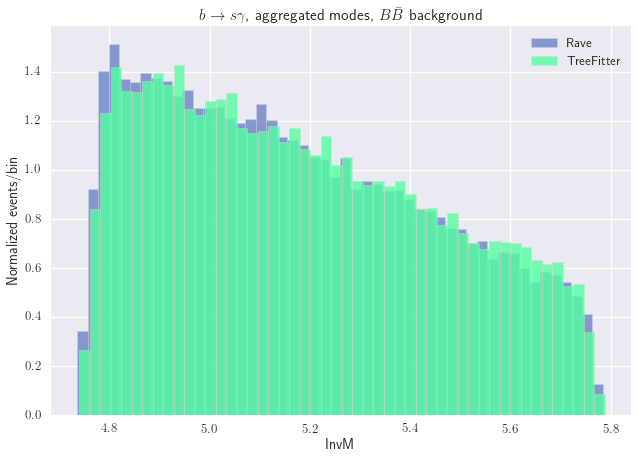

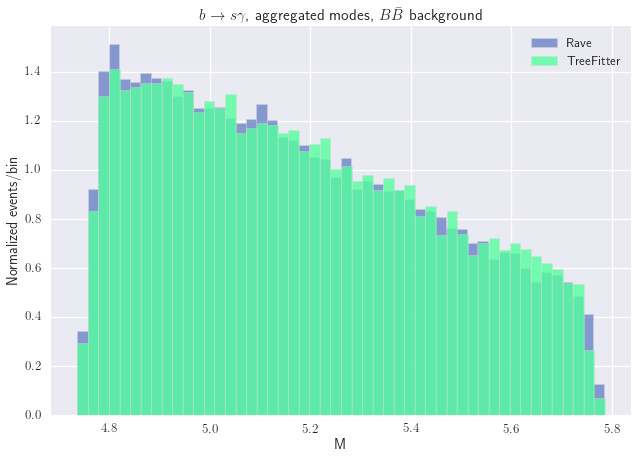

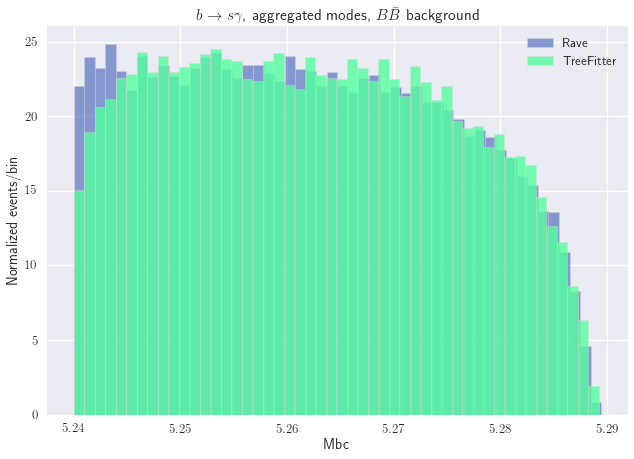

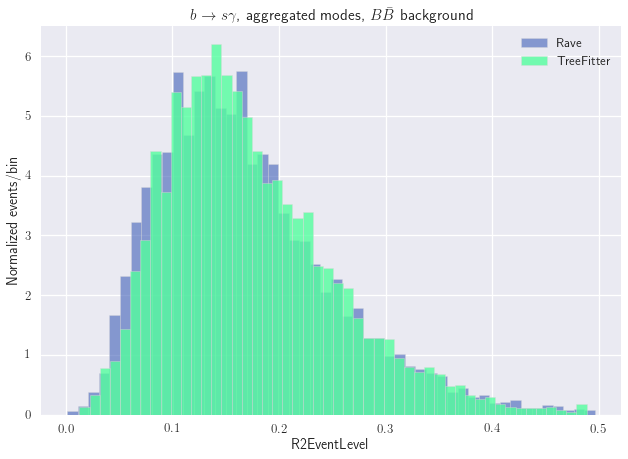

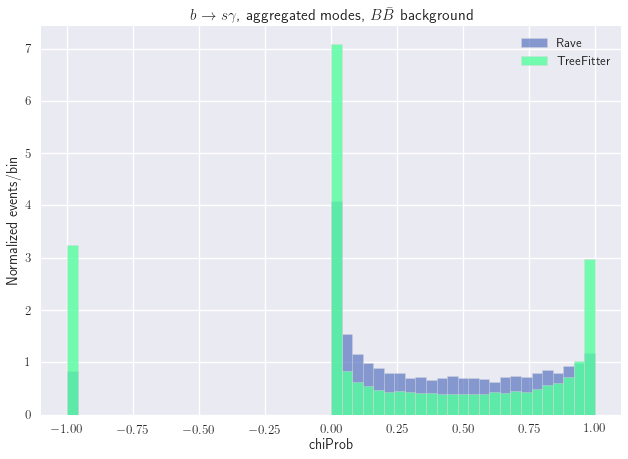

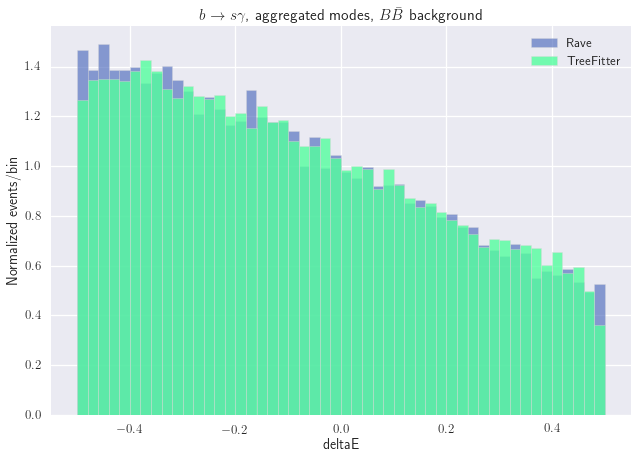

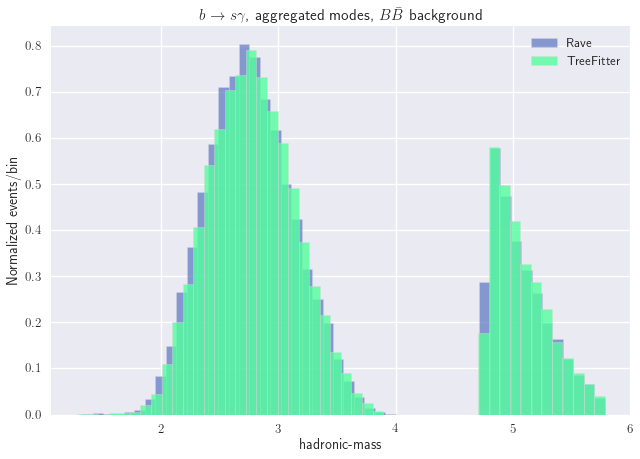

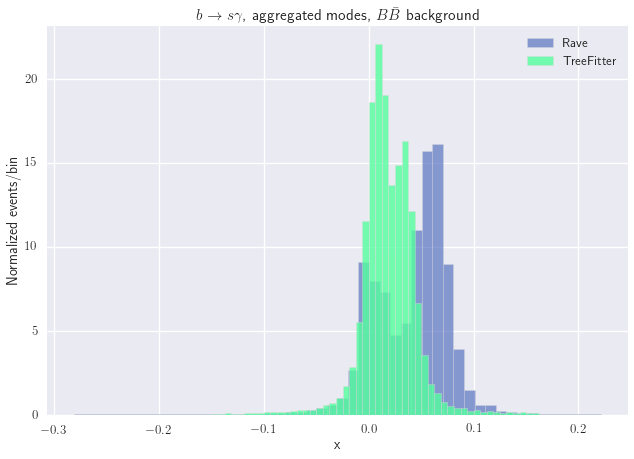

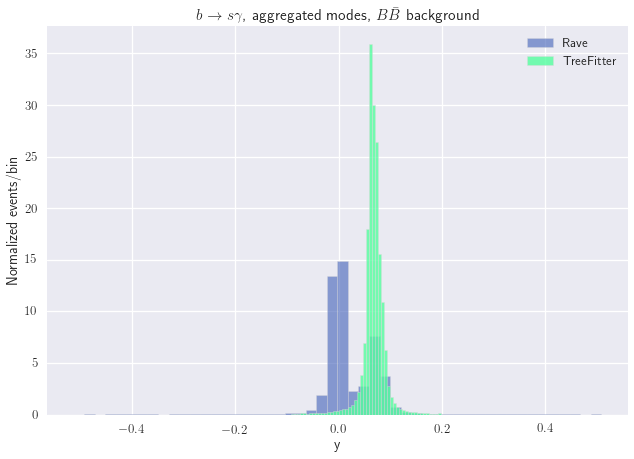

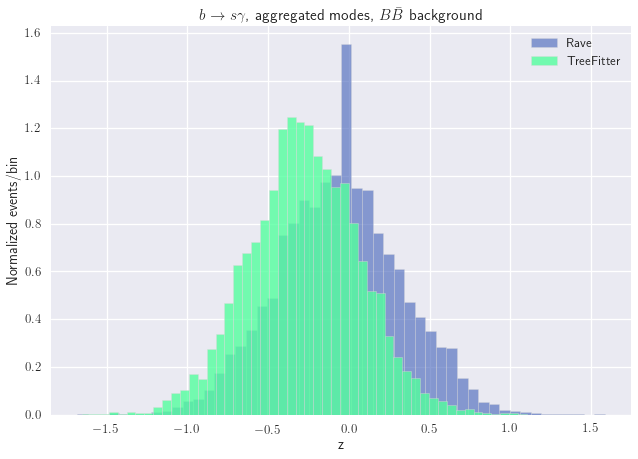

In [21]:
compare_histograms_overlay(df_generic_tfit, df_generic_rave, title=r'$b \rightarrow s \gamma$, aggregated modes, $B\bar{B}$ background', columns=[col for col in df_generic_tfit.columns if ('label' not in col and 'channel' not in col)])

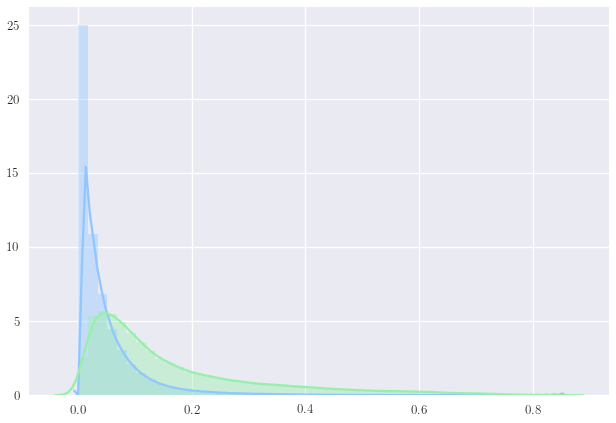

In [36]:
sns.distplot(y_prob_eta[np.logical_not(y_true_eta)], bins=50)
sns.distplot(y_prob_eta[y_true_eta.astype(bool)], bins=50)
plt.show()

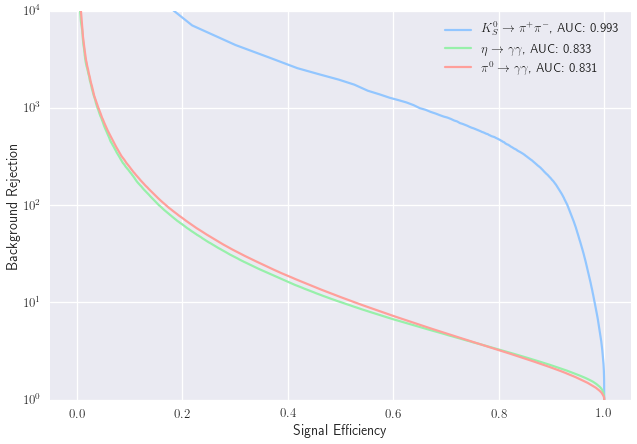

In [48]:
plt.figure()
# plt.title('blah')
for sig_eff, bkg_rej, name in zip(se, br, names):
    plt.semilogy(sig_eff, bkg_rej, lw=2.2, label=name)
# plt.axvline(x=sig_eff[np.argmax(fom)], c='r', lw=1, linestyle='--')
plt.ylim(1,1*10**4)
plt.xlabel('Signal Efficiency')
plt.ylabel('Background Rejection')
plt.legend(loc='best')
plt.savefig(os.path.join('graphs', 'multi_eff.pdf'), format='pdf', dpi=1000)
plt.show()